In [1]:
import os
import glob
import json
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

def load_from_pickle(filepath):
    """Load json_tempodata from a Pickle (.pkl) file."""
    # filepath = os.path.join(readpath, filename)
    with open(filepath, "rb") as f:
        json_tempodata = pickle.load(f)
    return json_tempodata

#### Single Plot: Tempo Range vs. Accuracy

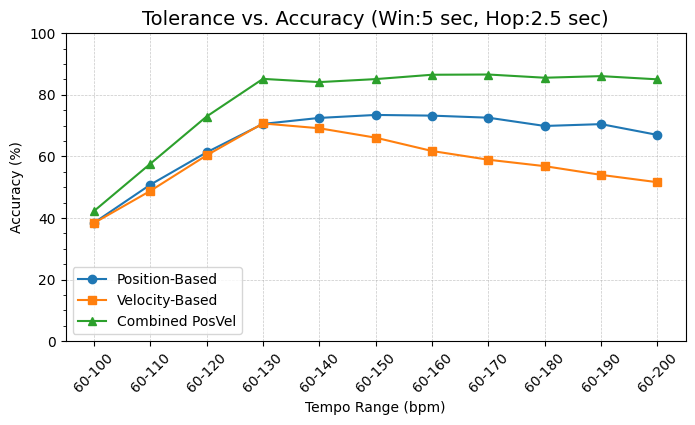

In [23]:

a = 60
b_list = [100,110,120,130,140,150,160,170,180,190,200]
mode = "uni"
norm_mode = "z-score"

w_sec = 5
h_sec = w_sec/2

tol = 6
tol_type = "rel"
case = "tempo_cases"
bpm_metric = "bpm_median_xy"

pos_acc_list = []
vel_acc_list = []
posvel_acc_list = []

# Iterate through window sizes
for b in b_list:

    # Load accuracy data
    hpos_hits_stats = load_from_pickle(f"./saved_results/{case}/tempo_{a}_{b}/stats_pos/{mode}/hit_stats_W{w_sec}H{h_sec}_{tol_type}{tol}_{mode}_{a}_{b}.pkl")
    hvel_hits_stats = load_from_pickle(f"./saved_results/{case}/tempo_{a}_{b}/stats_vel/{mode}/hit_stats_W{w_sec}H{h_sec}_{tol_type}{tol}_{mode}_{a}_{b}.pkl")
    hposvel_hits_stats = load_from_pickle(f"./saved_results/{case}/tempo_{a}_{b}/stats_posvel/{mode}/hit_stats_W{w_sec}H{h_sec}_{tol_type}{tol}_{mode}_{a}_{b}.pkl")

    # Extract accuracy
    pos_acc_list.append(hpos_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])  
    vel_acc_list.append(hvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])
    posvel_acc_list.append(hposvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])

# Create the plot
plt.figure(figsize=(8, 4), dpi=100)

xlabels = ["60-100", "60-110", "60-120", "60-130", "60-140", "60-150", 
        "60-160", "60-170", "60-180", "60-190", "60-200"]

plt.plot(xlabels, pos_acc_list, marker='o', linestyle='-', label="Position-Based")
plt.plot(xlabels, vel_acc_list, marker='s', linestyle='-', label="Velocity-Based")
plt.plot(xlabels, posvel_acc_list, marker='^', linestyle='-', label="Combined PosVel")

# Labels and titles
plt.title(f"Tolerance vs. Accuracy (Win:{w_sec} sec, Hop:{h_sec} sec)", fontsize=14)
plt.xlabel("Tempo Range (bpm)")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)  # Keep y-axis consistent
plt.tick_params(axis="x", rotation = 45)
plt.grid(True, which="major", linestyle="--", linewidth=0.5, alpha=0.7)
plt.minorticks_on()
plt.tick_params(axis="x", which="minor", bottom=False, top=False) 
plt.legend(fontsize=10)

# Show plot
plt.show()


#### Tempo range vs. Accuracy

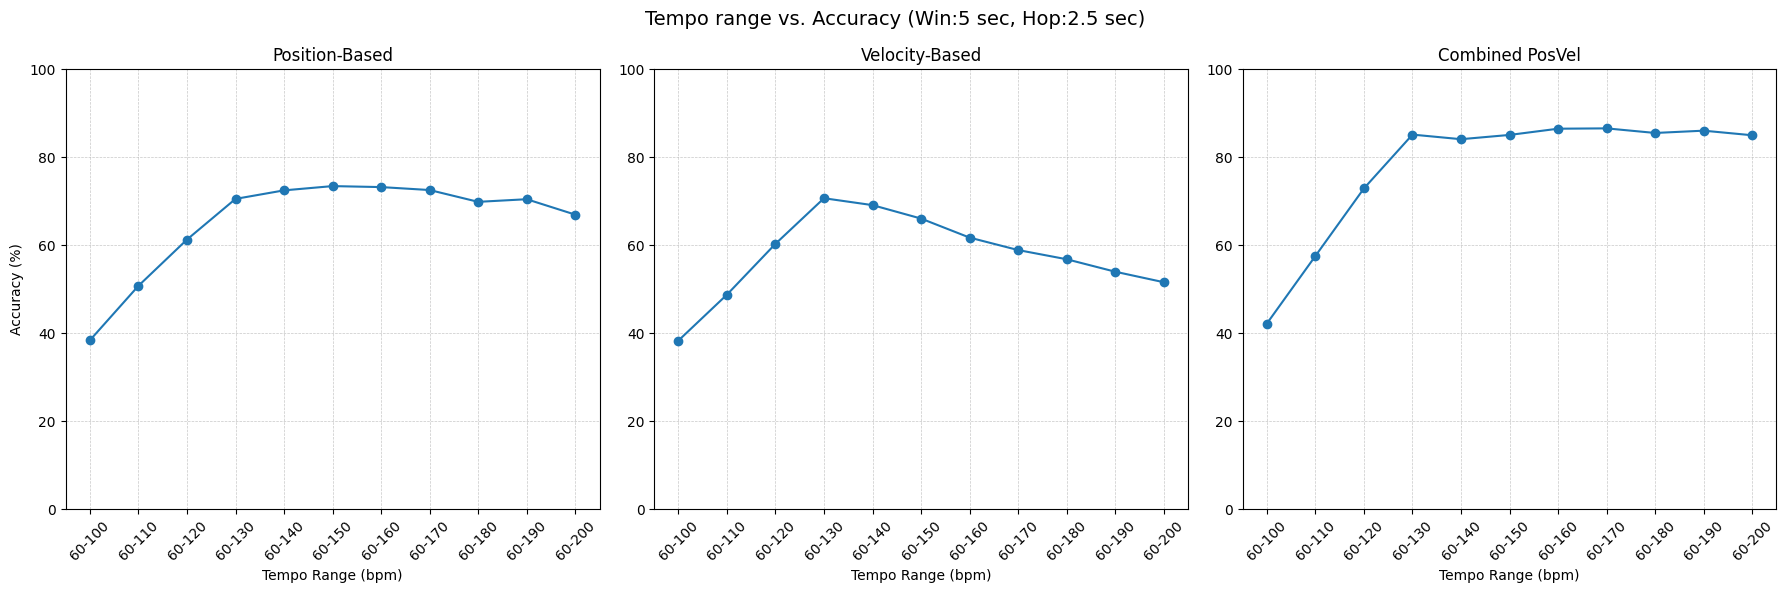

In [9]:
a = 60
b_list = [100,110,120,130,140,150,160,170,180,190,200]
mode = "uni"
norm_mode = "z-score"

w_sec = 5
h_sec = w_sec/2

tol = 6
tol_type = "rel"
case = "tempo_cases"
bpm_metric = "bpm_median_xy"

bpm_dict = {
    "bpm_avg_x": 0, "bpm_avg_y": 1, "bpm_avg_xy": 2, "bpm_mode_x": 3,
    "bpm_mode_y": 4, "bpm_mode_xy": 5, "bpm_median_x": 6, "bpm_median_y": 7,
    "bpm_median_xy": 8
    }

pos_acc_list = []
vel_acc_list = []
posvel_acc_list = []


for b in b_list:
    # Load accuracy data
    hpos_hits_stats = load_from_pickle(f"./saved_results/{case}/tempo_{a}_{b}/stats_pos/{mode}/hit_stats_W{w_sec}H{h_sec}_{tol_type}{tol}_{mode}_{a}_{b}.pkl")
    hvel_hits_stats = load_from_pickle(f"./saved_results/{case}/tempo_{a}_{b}/stats_vel/{mode}/hit_stats_W{w_sec}H{h_sec}_{tol_type}{tol}_{mode}_{a}_{b}.pkl")
    hposvel_hits_stats = load_from_pickle(f"./saved_results/{case}/tempo_{a}_{b}/stats_posvel/{mode}/hit_stats_W{w_sec}H{h_sec}_{tol_type}{tol}_{mode}_{a}_{b}.pkl")

    # Extract accuracy
    pos_acc_list.append(hpos_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])  
    vel_acc_list.append(hvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])
    posvel_acc_list.append(hposvel_hits_stats[bpm_metric]['hits_summary']['hits_percentage'][4])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=False)

titles = ["Position-Based", "Velocity-Based", "Combined PosVel"]
xlabels = ["60-100", "60-110", "60-120", "60-130", "60-140", "60-150", 
        "60-160", "60-170", "60-180", "60-190", "60-200"]
# Plot in respective subplots
axes[0].plot(xlabels, pos_acc_list, marker='o', linestyle='-')
axes[1].plot(xlabels, vel_acc_list, marker='o', linestyle='-')
axes[2].plot(xlabels, posvel_acc_list, marker='o', linestyle='-')

# Add titles and labels
for i, ax in enumerate(axes):
    ax.set_title(titles[i], fontsize=12)
    ax.set_xlabel("Tempo Range (bpm)")
    ax.set_ylim(0, 100)
    ax.tick_params(axis="x", rotation = 45)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)  # Enable minor grid
    # ax.minorticks_on()
    # ax.legend(fontsize=8)  # Add legend for hop sizes

axes[0].set_ylabel("Accuracy (%)")  # Add y-label only for first subplot

# Global title and layout
plt.suptitle(f"Tempo range vs. Accuracy (Win:{w_sec} sec, Hop:{h_sec} sec)", fontsize=14)
plt.tight_layout()
plt.show()